## Random Forest - Credit Default Prediction

In this lab, we will build a random forest model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.

<hr>

### Data Understanding and Cleaning

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('F:/mydata/credit-card-default.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

     ...      BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0    ...              0          0          0         0       689         0   
1    ...           3272       3455       3261         0      1000      1000   
2    ...          14331      14948      15549      1518      1500      1000   
3    ...          28314      28959      29547      2000      2019      1200   
4    ...          20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  defaulted  
0         0         0         0          1  
1      1000         0      2000          1  
2      1000      1000      5000          0  
3      1100      1069      1000          0  
4      9000       689       679          0  

[5 rows x 25 columns]

In [3]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

<hr>

### Data Preparation and Model Building

In [4]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [5]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [6]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [7]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
# Making predictions
predictions = rfc.predict(X_test)

In [9]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [10]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.95      0.89      7058
          1       0.61      0.30      0.40      1942

avg / total       0.78      0.81      0.78      9000



In [11]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6680  378]
 [1355  587]]


In [12]:
print(accuracy_score(y_test,predictions))

0.807444444444


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


<hr>

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [13]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [14]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.140518      0.016773         0.003446        0.006892   
1       0.350633      0.012181         0.012992        0.006516   
2       0.578630      0.060730         0.013107        0.008426   
3       0.667978      0.017547         0.011906        0.006468   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.801476           0.804762   
1               7   {'max_depth': 7}           0.812188           0.820714   
2              12  {'max_depth': 12}           0.810045           0.813333   
3              17  {'max_depth': 17}           0.803618           0.808571   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.800952           0.793333       ...                0.800810   
1           0.814524           0.810952       ...                0.815095   
2           0.813095           0.807381       ...                0.811095   
3           0.810714           0.802143       ...                0.804476   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003984                4            0.799690            0.800714   
1        0.003508                1            0.826597            0.829583   
2        0.002199                2            0.877671            0.875119   
3        0.004751                3            0.922376            0.924405   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.801786            0.801429            0.804178   
1            0.828155            0.831607            0.829355   
2            0.881429            0.881548            0.880245   
3            0.927857            0.924405            0.927861   

   mean_train_score  std_train_score  
0          0.801559         0.001492  
1          0.829059         0.001657  
2          0.879202         0.002472  
3          0.925381         0.002155  

[4 rows x 21 columns]

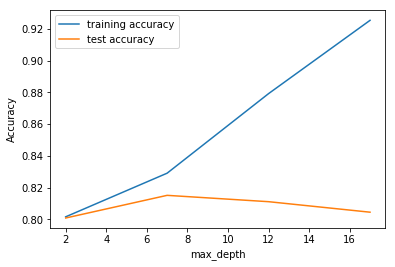

In [15]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [16]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.232185      0.056414         0.061798        0.006902   
1      10.856959      0.273957         0.268445        0.020653   
2      19.813592      0.282842         0.524072        0.042625   
3      28.312379      1.059451         0.722309        0.030006   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.811473   
1                500   {'n_estimators': 500}           0.810997   
2                900   {'n_estimators': 900}           0.810759   
3               1300  {'n_estimators': 1300}           0.812426   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.814048           0.812143           0.805952       ...          
1           0.814762           0.810952           0.806429       ...          
2           0.813571           0.810952           0.805714       ...          
3           0.814048           0.811190           0.805476       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.810048        0.003192                2            0.810167   
1         0.809810        0.003284                3            0.811358   
2         0.809762        0.002724                4            0.810882   
3         0.810095        0.003200                1            0.811477   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.810476            0.811905            0.812976   
1            0.810952            0.812024            0.812560   
2            0.810417            0.811071            0.812381   
3            0.810595            0.811310            0.812500   

   split4_train_score  mean_train_score  std_train_score  
0            0.812928          0.811690         0.001185  
1            0.812571          0.811893         0.000647  
2            0.813047          0.811559         0.000989  
3            0.812809          0.811738         0.000811  

[4 rows x 21 columns]

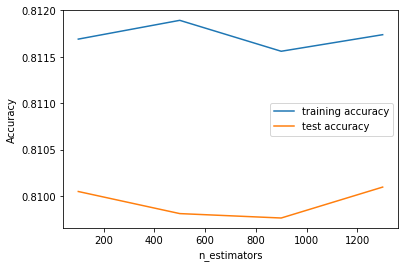

In [18]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [19]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.203587      0.051384         0.007020        0.001796   
1       0.390826      0.041986         0.007159        0.001357   
2       0.625838      0.051619         0.005386        0.001927   
3       0.838225      0.024547         0.007872        0.001572   
4       0.867166      0.065273         0.007361        0.001741   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.807189   
1                  8   {'max_features': 8}           0.815520   
2                 14  {'max_features': 14}           0.816472   
3                 20  {'max_features': 20}           0.818853   
4                 24  {'max_features': 24}           0.818139   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.819048           0.806905           0.802143       ...          
1           0.821667           0.820714           0.816667       ...          
2           0.821905           0.820476           0.818095       ...          
3           0.821667           0.819524           0.817143       ...          
4           0.822857           0.819524           0.817857       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.808762        0.005578                5            0.808262   
1         0.816667        0.004586                4            0.821775   
2         0.818952        0.001961                2            0.822251   
3         0.818857        0.001695                3            0.822251   
4         0.819286        0.001881                1            0.822787   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.815655            0.806667            0.811012   
1            0.819702            0.820893            0.820357   
2            0.820595            0.821369            0.822024   
3            0.820833            0.822024            0.822738   
4            0.821429            0.821488            0.822440   

   split4_train_score  mean_train_score  std_train_score  
0            0.812095          0.810738         0.003124  
1            0.814059          0.819357         0.002735  
2            0.821677          0.821583         0.000578  
3            0.822511          0.822071         0.000664  
4            0.822927          0.822214         0.000638  

[5 rows x 21 columns]

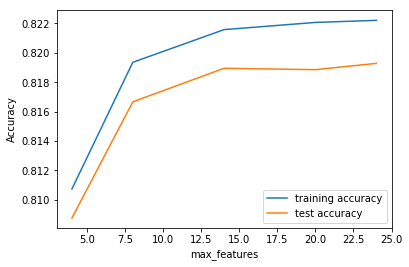

In [21]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [22]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.283178      0.008599         0.008881        0.002819   
1       0.313797      0.049460         0.008765        0.002692   
2       0.318404      0.026034         0.008897        0.003078   
3       0.317431      0.017533         0.009735        0.004229   
4       0.302032      0.018238         0.009264        0.002199   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.810997   
1                    150  {'min_samples_leaf': 150}           0.809331   
2                    200  {'min_samples_leaf': 200}           0.805522   
3                    250  {'min_samples_leaf': 250}           0.802904   
4                    300  {'min_samples_leaf': 300}           0.808379   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.812619           0.816667           0.801905       ...          
1           0.809762           0.817143           0.801429       ...          
2           0.809286           0.809048           0.804762       ...          
3           0.812143           0.807857           0.809524       ...          
4           0.806905           0.807619           0.807381       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.810333        0.004849                1            0.814632   
1         0.809714        0.005008                2            0.807310   
2         0.806714        0.002019                4            0.806774   
3         0.806286        0.004728                5            0.804334   
4         0.807381        0.000610                3            0.804334   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.810714            0.816726            0.811369   
1            0.806786            0.813869            0.809167   
2            0.805298            0.812798            0.809107   
3            0.813393            0.806429            0.813452   
4            0.804583            0.810238            0.810774   

   split4_train_score  mean_train_score  std_train_score  
0            0.816201          0.813929         0.002465  
1            0.817511          0.810928         0.004131  
2            0.810249          0.808845         0.002628  
3            0.803940          0.808310         0.004260  
4            0.810428          0.808071         0.002956  

[5 rows x 21 columns]

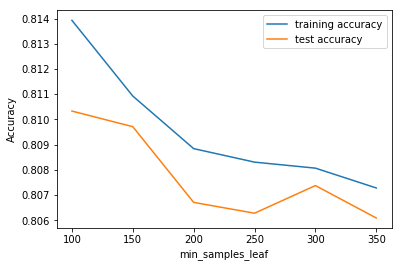

In [24]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [25]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.566255      0.056163         0.012528        0.003038   
1       0.558811      0.060427         0.012111        0.003118   
2       0.533534      0.129730         0.016113        0.009138   
3       0.470757      0.042338         0.011231        0.003110   
4       0.473441      0.026447         0.011711        0.003611   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.817424   
1                     250  {'min_samples_split': 250}           0.817186   
2                     300  {'min_samples_split': 300}           0.817662   
3                     350  {'min_samples_split': 350}           0.817662   
4                     400  {'min_samples_split': 400}           0.817662   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.817619           0.818571           0.811190       ...          
1           0.818333           0.819048           0.814286       ...          
2           0.819048           0.818810           0.815238       ...          
3           0.818333           0.818810           0.814286       ...          
4           0.819762           0.815000           0.815714       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.816048        0.002635                6            0.824037   
1         0.817000        0.001679                2            0.822608   
2         0.817143        0.001737                1            0.820644   
3         0.817000        0.001676                2            0.821537   
4         0.816381        0.002110                5            0.820525   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.823393            0.823036            0.824226   
1            0.820595            0.821786            0.823214   
2            0.819286            0.819762            0.822143   
3            0.818750            0.817976            0.819643   
4            0.816310            0.818571            0.821369   

   split4_train_score  mean_train_score  std_train_score  
0            0.823582          0.823655         0.000431  
1            0.823939          0.822429         0.001158  
2            0.820249          0.820417         0.000976  
3            0.821856          0.819952         0.001522  
4            0.819535          0.819262         0.001749  

[5 rows x 21 columns]

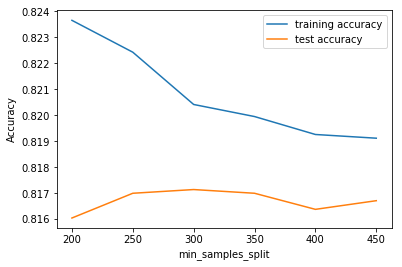

In [27]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [28]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [29]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 11.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [30]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.818523809524 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


**Fitting the final model with the best parameters obtained from grid search.**

In [31]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [32]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
# predict
predictions = rfc.predict(X_test)

In [34]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90      7058
          1       0.69      0.36      0.47      1942

avg / total       0.81      0.83      0.80      9000



In [36]:
print(confusion_matrix(y_test,predictions))

[[6753  305]
 [1252  690]]
